In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")

## Q1 create a dataframe with station counts averages by day-of-week

In [3]:
start_day = [pd.to_datetime(x).dayofweek+1 for x in df.starttime]
stop_day = [pd.to_datetime(x).dayofweek+1 for x in df.stoptime]

In [4]:
df['startday'] = start_day
df['stopday'] = stop_day

In [5]:
groupby_day_from = df.groupby(['startday','from_station_id']).size()
groupby_day_to = df.groupby(['stopday','to_station_id']).size()

In [6]:
count_dayofweek = pd.DataFrame({'From': groupby_day_from.sort_index(), 'To': groupby_day_to.sort_index()})

In [7]:
count_dayofweek.columns.names = ['station']

In [8]:
count_dayofweek['Difference(From-To)'] = (count_dayofweek['From']-count_dayofweek['To'])
count_dayofweek

station     From    To  Difference(From-To)
1 BT-01    806.0   791                 15.0
  BT-03    577.0   534                 43.0
  BT-04    387.0   328                 59.0
  BT-05    500.0   507                 -7.0
  CBD-03   467.0   623               -156.0
  CBD-04   107.0    88                 19.0
  CBD-05   416.0   621               -205.0
  CBD-06   460.0   721               -261.0
  CBD-07   235.0   267                -32.0
  CBD-13   840.0  1048               -208.0
  CD-01     67.0    58                  9.0
  CH-01    503.0   286                217.0
  CH-02    725.0   436                289.0
  CH-03    490.0   349                141.0
  CH-05    590.0   178                412.0
  CH-06    260.0    85                175.0
  CH-07    807.0   238                569.0
  CH-08    684.0   433                251.0
  CH-09    417.0   294                123.0
  CH-12    357.0   261                 96.0
  CH-15    410.0   169                241.0
  DPD-01   416.0   563               -147.0
  DPD-03   137.0   117                 20.0
  EL-01    253.0   306                -53.0
  EL-03    408.0   551               -143.0
  EL-05    273.0   342                -69.0
  FH-01    295.0   105                190.0
  FH-04    313.0   209                104.0
  ID-04    193.0   320               -127.0
  PS-04    390.0   613               -223.0
...          ...   ...                  ...
7 EL-03    303.0   344                -41.0
  EL-05    346.0   404                -58.0
  FH-01    223.0   107                116.0
  FH-04    193.0   166                 27.0
  ID-04    210.0   295                -85.0
  PS-04    409.0   586               -177.0
  PS-05    204.0   335               -131.0
  SLU-01   375.0   428                -53.0
  SLU-02   274.0   293                -19.0
  SLU-04   224.0   319                -95.0
  SLU-07   323.0   413                -90.0
  SLU-15   497.0   558                -61.0
  SLU-16   300.0   394                -94.0
  SLU-17   593.0   647                -54.0
  SLU-18   259.0   233                 26.0
  SLU-19   555.0   598                -43.0
  SLU-20    76.0    77                 -1.0
  SLU-21    12.0     7                  5.0
  UD-01    342.0   348                 -6.0
  UD-02    101.0    82                 19.0
  UD-04    295.0   376                -81.0
  UD-07    182.0   162                 20.0
  UW-01     55.0    55                  0.0
  UW-02    188.0   137                 51.0
  UW-04    227.0   222                  5.0
  UW-06    128.0   135                 -7.0
  UW-07    105.0   134                -29.0
  UW-10    114.0   147                -33.0
  WF-01   1188.0  1324               -136.0
  WF-04    598.0   785               -187.0

[383 rows x 3 columns]

In [21]:
dow_count = df['startday'].value_counts()

In [27]:
# get average difference: column of 'Difference(From-To)'/total counts for each day of week
for i in range(len(dow_count)):
    count_dayofweek.loc[i+1]['Difference(From-To)']=count_dayofweek.loc[i+1]['Difference(From-To)']/dow_count.get_value(i+1)

/Users/yawenli/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Q2 structure the 7 day-of-week plots as subplots

In [10]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
      plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
      plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts:
      plt.ylim(opts['ylim'])
    if 'title' in opts:
      plt.title(opts['title'])

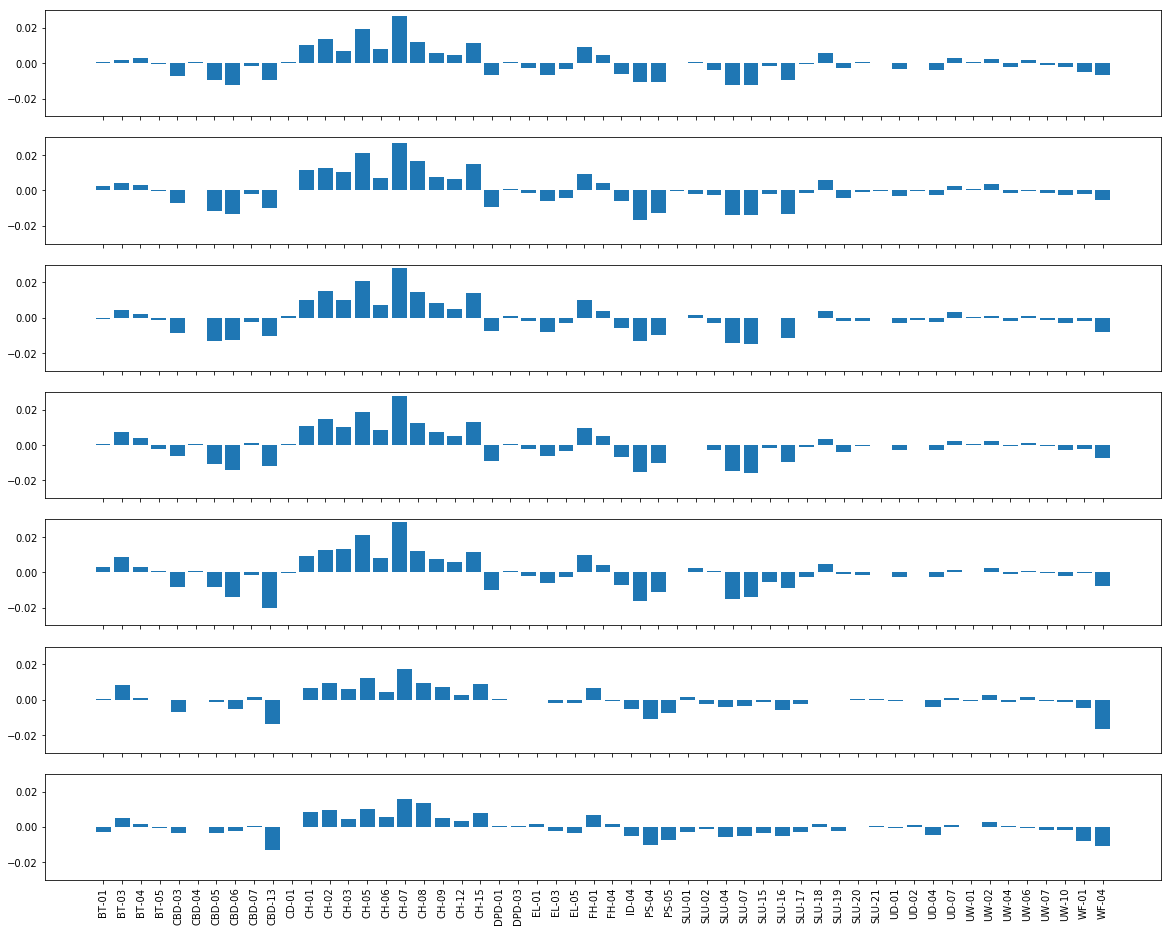

In [29]:
def plot_barN(df, dayOfWeek, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_plots = len(dayOfWeek)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for i in range(len(dayOfWeek)):
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        if 'title' in opts:
            local_opts['title'] = opts['title'][i]
        if idx == num_plots:
            local_opts['xticks'] = True
            if 'xlabel' in opts:
                local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_plots, 1, idx)
        plot_bar1(df.ix[idx],'Difference(From-To)', local_opts)
    
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {'ylim':[-0.03,0.03]}
plot_barN(count_dayofweek, dayOfWeek, opts)

## Q3 label the plots by day-of-week

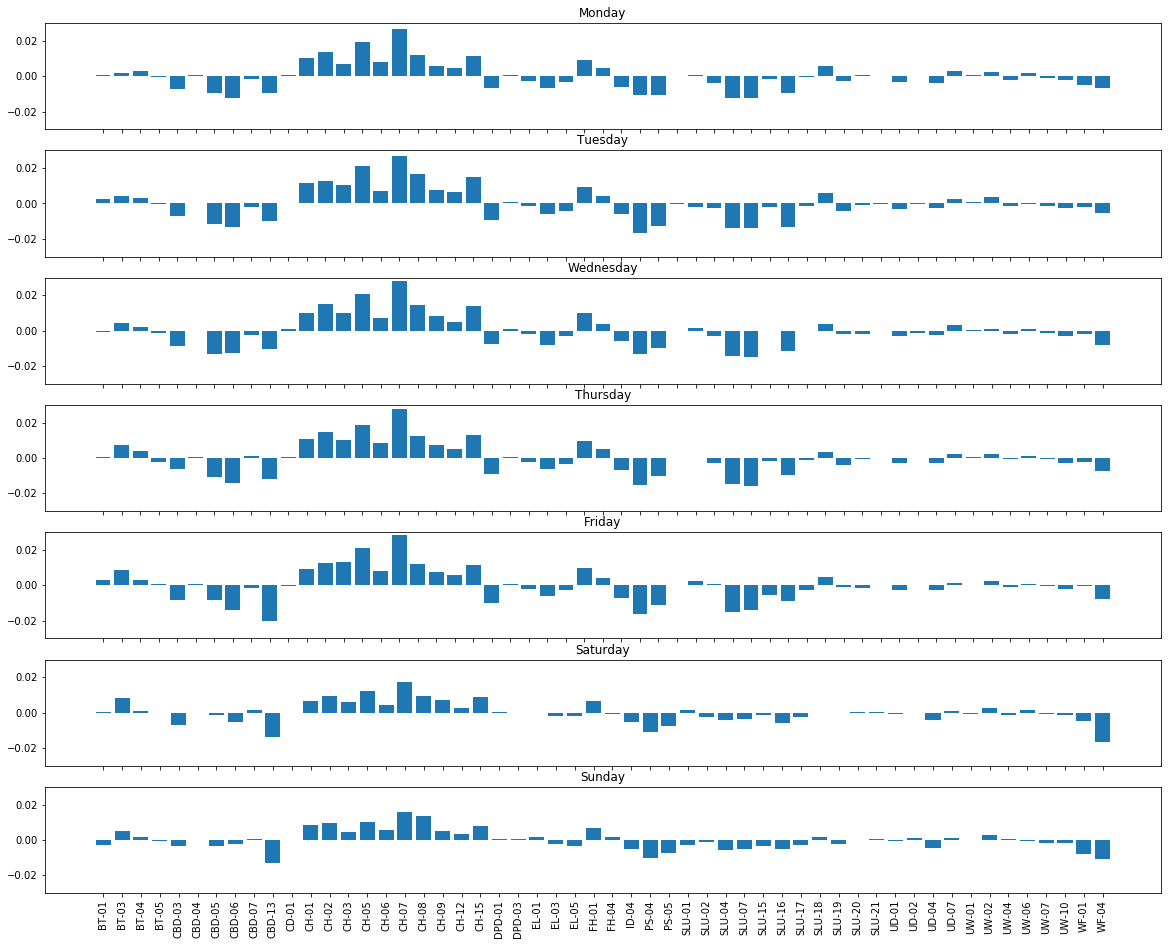

In [30]:
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {'title':dayOfWeek,'ylim':[-0.03,0.03]}
plot_barN(count_dayofweek, dayOfWeek, opts)

## Q4 label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

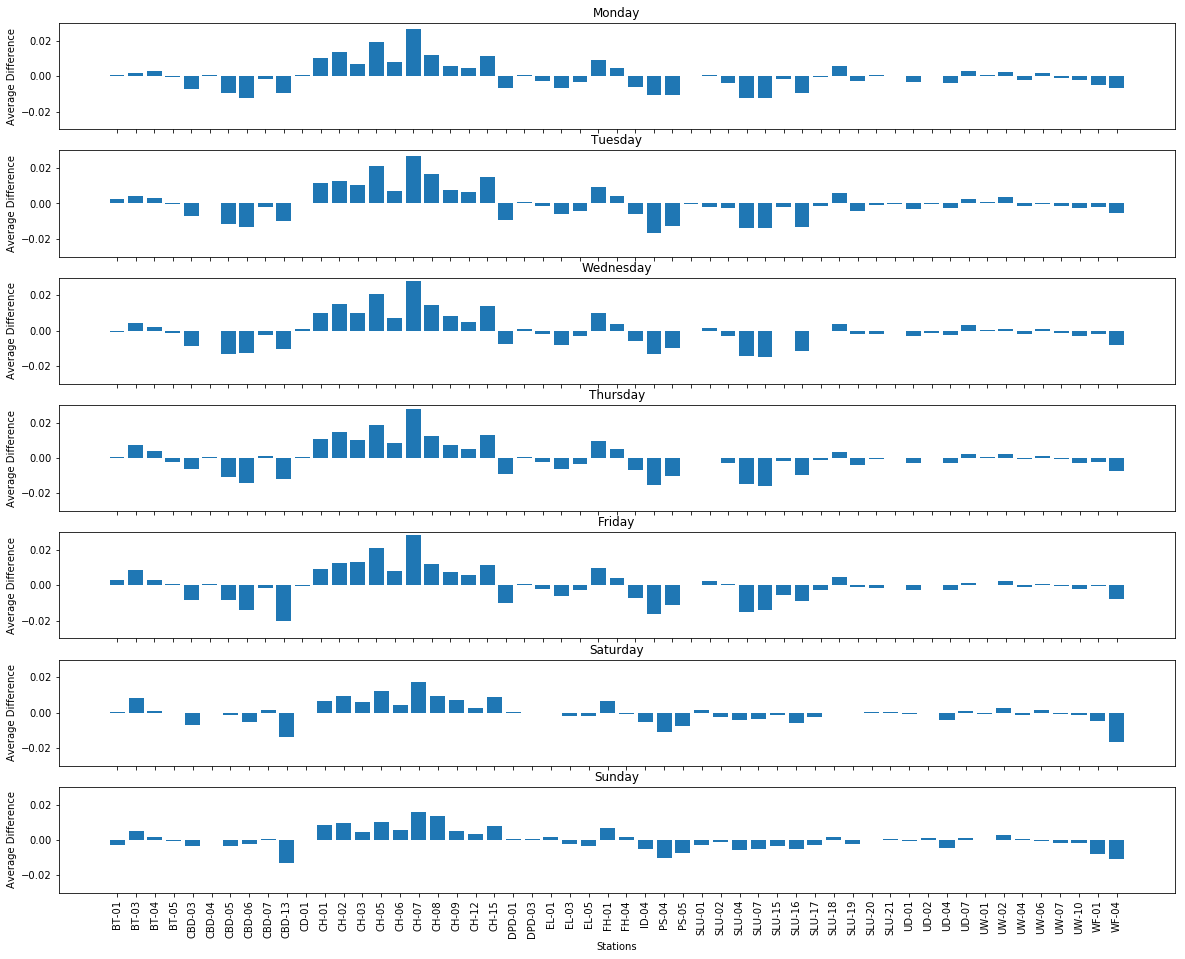

In [31]:
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {'xlabel': 'Stations', 'ylabel': 'Average Difference', 'title':dayOfWeek,'ylim':[-0.03,0.03]}
plot_barN(count_dayofweek, dayOfWeek, opts)